In [2]:
#multi linear regression to predict insurance cost
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import sys


In [3]:

cols = list(pd.read_csv("insurance.csv"))
print(cols)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [4]:
data = pd.read_csv("insurance.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#finding number of rows and columns
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
X = data.iloc[:,:-1].values
y = data.iloc[:,6].values
print(y)


[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [11]:
print(X)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [12]:
#Encoding the categorical data for "State" predictor. 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labelencoder = LabelEncoder()



In [13]:
le.fit(X[:,5])
list(le.inverse_transform([0, 1, 2, 3]))

['northeast', 'northwest', 'southeast', 'southwest']

In [14]:
le.fit(X[:,1])
list(le.inverse_transform([0, 1]))

['female', 'male']

In [15]:
le.fit(X[:,4])
list(le.inverse_transform([0, 1]))

['no', 'yes']

In [16]:
X[:,1] = labelencoder.fit_transform(X[:,1])
X[:,5] = labelencoder.fit_transform(X[:,5])
X[:,4] = labelencoder.fit_transform(X[:,4])

In [17]:

print(X)

[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 ...
 [18 0 36.85 0 0 2]
 [21 0 25.8 0 0 3]
 [61 0 29.07 0 1 1]]


<AxesSubplot:>

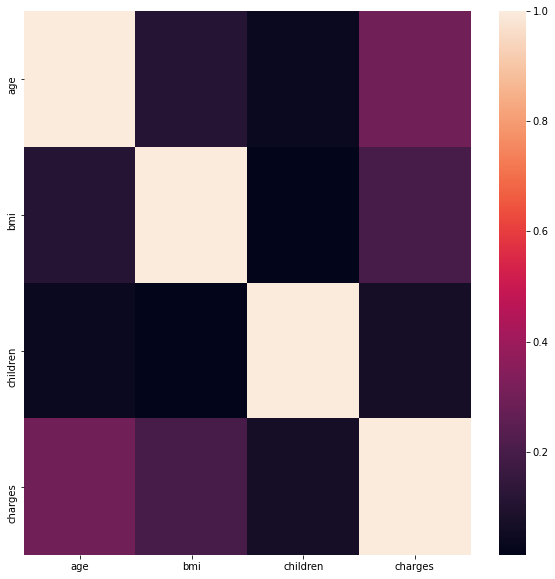

In [18]:
#exploratory data analysis
#correlation heat map
corelation = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corelation)



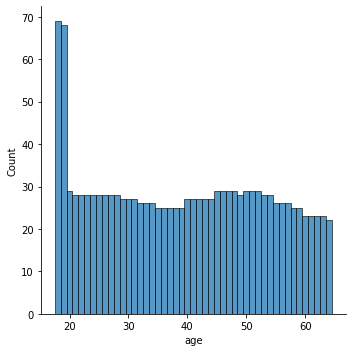

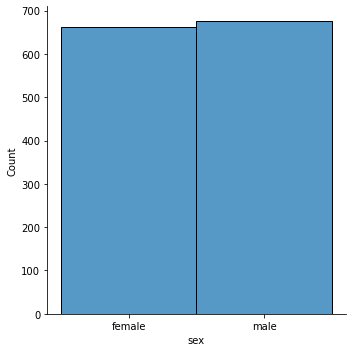

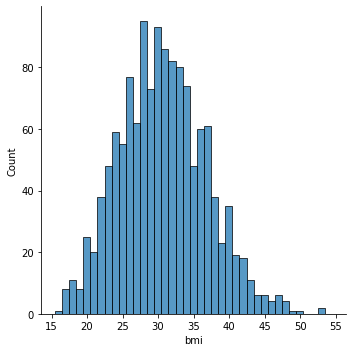

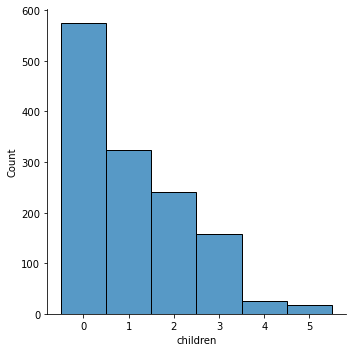

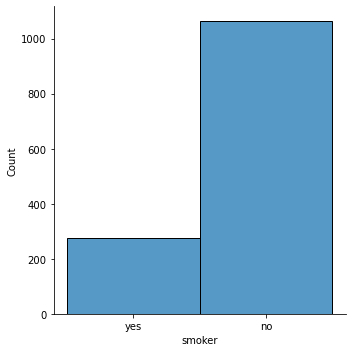

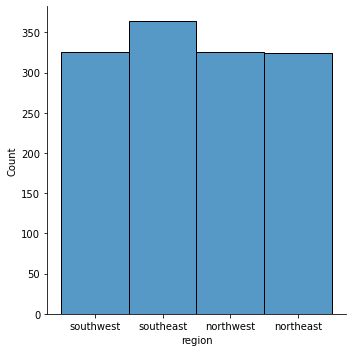

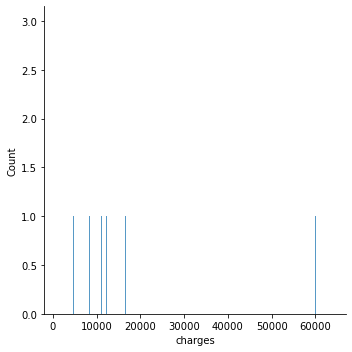

In [81]:
#drawing histograms of different columns to know the distribution
for i in data:
      sns.displot(data[i], discrete = True)

In [19]:
#Splitting the data in training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
#Fitting the Multiple linear rehression on training set.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
#Predicting on test set.
y_pred = reg.predict(X_test)
y_pred

array([ 3948.63953906, 10693.29887917, 31113.55750889, 10405.72824989,
        7117.42915988, 12182.40460143,  2196.22562816,  7010.56721022,
       10367.05780311, 11494.95594135,  4919.13046534,  5674.975242  ,
       16070.64011835, 10190.91051384, 10618.78837386, 14246.68525126,
       34168.50945411, 37299.24882888, 14608.84439395,  7360.95359356,
        -159.91984291, 32276.99845491, 10966.43453728,  9535.27159119,
        7939.42430912,  7997.49028087, 30122.82748702, 27400.16504239,
       10974.58695588,  7098.76694466, 26868.03876152,  2710.99142643,
       16042.7988952 , 28519.81413639,  8452.6893376 , 13785.06023083,
       30184.93030039, 33690.29844968, 35179.62786144,  9389.14588612,
       16712.69296807, 12279.17301038, 35500.94472726,   772.95145574,
         320.16320158,  5367.43108702,  2117.86628118,  8924.43396734,
        1228.75153449,  2876.27325141,  9829.1909962 , 29925.50449941,
        5997.95205744, 12628.66040373, 35597.79017067,    96.93566609,
      

In [21]:
y_test

array([ 4032.2407 ,  7160.094  , 43943.8761 , 32108.66282,  3277.161  ,
        8823.98575,  4296.2712 ,  9264.797  , 10942.13205, 12323.936  ,
        4234.927  ,  3172.018  , 13228.84695,  5397.6167 , 11150.78   ,
       11264.541  , 39556.4945 , 44260.7499 , 10450.552  ,  9991.03765,
        1627.28245, 39611.7577 , 25517.11363,  9301.89355,  4670.64   ,
        6548.19505, 20234.85475, 34439.8559 ,  2438.0552 ,  6059.173  ,
       16115.3045 ,  2155.6815 , 13887.204  , 18608.262  ,  3201.24515,
       11488.31695, 36837.467  , 39983.42595, 41949.2441 ,  9095.06825,
       11566.30055, 14451.83515, 48885.13561,  2201.0971 ,  1737.376  ,
        4894.7533 ,  1744.465  ,  6128.79745,  1615.7667 ,  1977.815  ,
        9282.4806 , 19515.5416 ,  1634.5734 , 13224.693  , 42124.5153 ,
       11884.04858,  3385.39915,  7162.0122 ,  7196.867  , 11987.1682 ,
       19798.05455, 13635.6379 , 12629.1656 , 13887.9685 , 37701.8768 ,
       14043.4767 , 47462.894  ,  3981.9768 ,  3378.91   ,  2730

In [22]:
reg.score(X_test,y_test)

0.776035771068343

In [23]:
y_pred - y_test

array([   -83.60116094,   3533.20487917, -12830.31859111, -21702.93457011,
         3840.26815988,   3358.41885143,  -2100.04557184,  -2254.22978978,
         -575.07424689,   -828.98005865,    684.20346534,   2502.957242  ,
         2841.79316835,   4793.29381384,   -531.99162614,   2982.14425126,
        -5387.98504589,  -6961.50107112,   4158.29239395,  -2630.08405644,
        -1787.20229291,  -7334.75924509, -14550.67909272,    233.37804119,
         3268.78430912,   1449.29523087,   9887.97273702,  -7039.69085761,
         8536.53175588,   1039.59394466,  10752.73426152,    555.30992643,
         2155.5948952 ,   9911.55213639,   5251.4441876 ,   2296.74328083,
        -6652.53669961,  -6293.12750032,  -6769.61623856,    294.07763612,
         5146.39241807,  -2172.66213962, -13384.19088274,  -1428.14564426,
        -1417.21279842,    472.67778702,    373.40128118,   2795.63651734,
         -387.01516551,    898.45825141,    546.7103962 ,  10409.96289941,
         4363.37865744,  

Text(0, 0.5, 'Predicted')

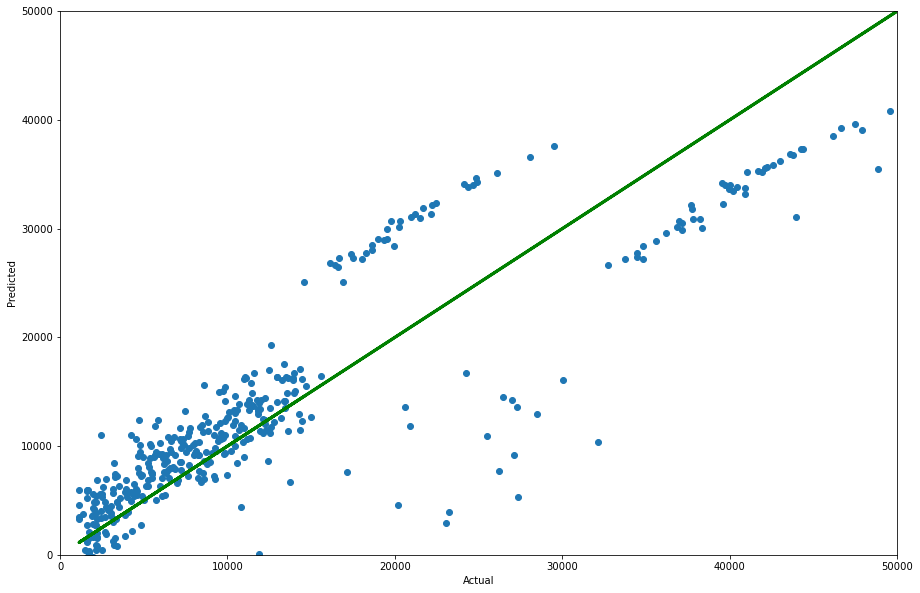

In [24]:
plt.figure(figsize = (15,10))
plt.xlim([0, 50000])
plt.ylim([0, 50000])
plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, color='green', linewidth=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')